In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import pandas_profiling

In [3]:
df = pd.read_csv('data/Absenteeism_at_work.csv')

In [ ]:
pandas_profiling.ProfileReport(df)

In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
df.drop(['ID'],axis=1, inplace=True)

In [27]:
numerical = ['Absenteeism time in hours', 'Age', 
             'Body mass index', 'Distance from Residence to Work',
             'Height', 'Hit target', 'Service time', 'Transportation expense',
             'Weight', 'Work load Average/day ']
categorical = [col for col in df.columns if col not in numerical]


In [ ]:
#sns.pairplot(df)
plt.figure(figsize=(8,8))


In [6]:
df = df[~df.duplicated()]

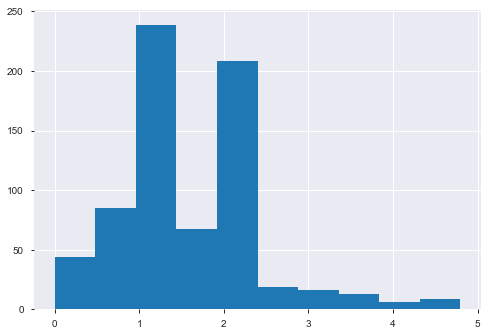

In [7]:
(df['Absenteeism time in hours'] + 1).apply(np.log).hist();

In [8]:
df['Absenteeism time in hours'] = (df['Absenteeism time in hours']+1).apply(np.log)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
    df.drop(['Absenteeism time in hours'], axis=1), 
    df['Absenteeism time in hours'],
    test_size=0.3
)

In [11]:
df[categorical].head()

NameError: name 'categorical' is not defined

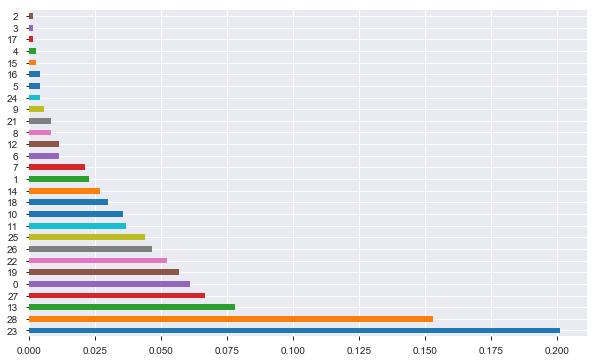

In [12]:
df['Reason for absence'].value_counts(normalize=True).plot.barh(figsize=(10,6))

In [13]:
df.shape

(706, 20)

In [14]:
df['Reason for absence'].value_counts(normalize=True)

23    0.201133
28    0.152975
13    0.077904
27    0.066572
0     0.060907
19    0.056657
22    0.052408
26    0.046742
25    0.043909
11    0.036827
10    0.035411
18    0.029745
14    0.026912
1     0.022663
7     0.021246
6     0.011331
12    0.011331
8     0.008499
21    0.008499
9     0.005666
24    0.004249
5     0.004249
16    0.004249
15    0.002833
4     0.002833
17    0.001416
3     0.001416
2     0.001416
Name: Reason for absence, dtype: float64

In [15]:
df['Reason for absence'].value_counts(normalize=True)[:5]

23    0.201133
28    0.152975
13    0.077904
27    0.066572
0     0.060907
Name: Reason for absence, dtype: float64

In [16]:
stay = [0, 27, 13, 23, 28]
df['Reason for absence'] = df['Reason for absence'].apply(lambda x: x if x in stay else -1)

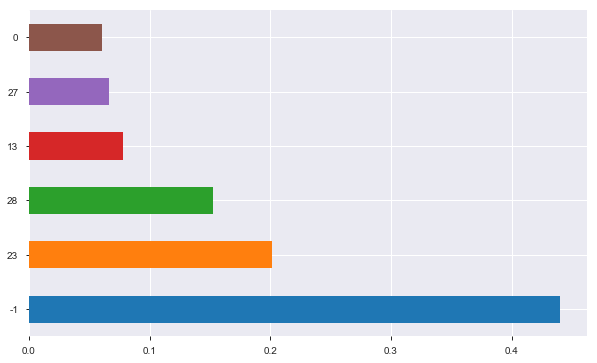

In [17]:
df['Reason for absence'].value_counts(normalize=True).plot.barh(figsize=(10,6))

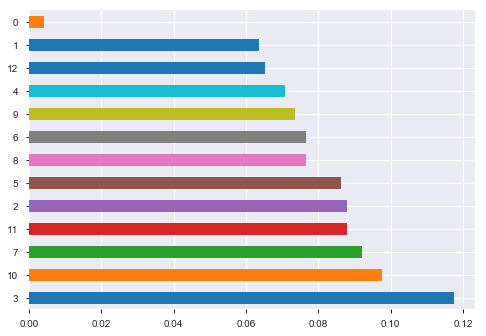

In [19]:
df['Month of absence'].value_counts(normalize=True).plot.barh()

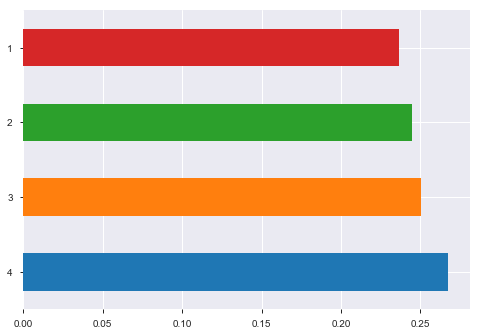

In [21]:
df['Seasons'].value_counts(normalize=True).plot.barh()

In [22]:
df.drop(['Month of absence'], axis=1, inplace=True)

In [24]:
df['Day of the week'].value_counts()

2    158
3    150
4    144
6    135
5    119
Name: Day of the week, dtype: int64

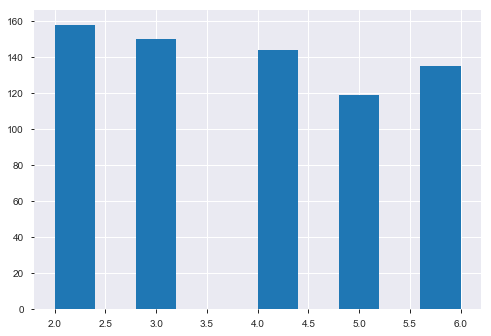

In [25]:
df['Day of the week'].hist()

In [26]:
df['Pet'] = df['Pet'].apply(lambda x: x if x in [0, 1] else "more")

In [29]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [30]:
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Absenteeism time in hours'], axis=1),
    df['Absenteeism time in hours'],
    test_size=0.3)

In [ ]:
X_train_scaled_numeric = scaler.fit_transform(X_train[numerical])
X_test_scaled_numeric = scaler.transform(X_test[numerical])
X_train[numerical] = X_train_scaled_numeric
X_test[numerical] = X_test_scaled_numeric

In [35]:
scaler = StandardScaler()